##  Library 
test

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30


from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols

import scipy.stats as stats
from ipywidgets import widgets
import math as math
import itertools


import scipy.stats as stats
from scipy.stats import norm
import pymc3 as pm
import theano
from theano import tensor as T
from pymc3.math import switch

### Import data

In [2]:
# read data
start = time.time()
path = '/Users/cyuancheng/Documents/course/Springboard/Capstone1/data/'
df = pd.read_csv(path+'data_eda.csv', low_memory=False, index_col=0, \
                 parse_dates=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'] )
end = time.time()
print('It takes  ' + str(round((end-start)/60, 1)) +' min to read the data')

It takes  5.6 min to read the data


In [3]:
df.head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,int_rate,revol_util,loan_status,home_ownership,sub_grade,debt_settlement_flag,grade,application_type,purpose,initial_list_status,hardship_flag,title,emp_length,pymnt_plan,verification_status,addr_state,term,loan_amnt,funded_amnt,funded_amnt_inv,int_rate.1,...,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_period,target,region,fico,emp_length_num
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10224583,2013-12-01,2001-06-01,2016-02-01,2018-06-01,14.98,66.2,Fully Paid,MORTGAGE,C3,N,C,Individual,other,f,N,Other,10+ years,n,Not Verified,NY,36 months,11100.0,11100.0,11100.0,14.98,...,8.0,4.0,4.0,0.0,8.0,11.0,8.0,9.0,0.0,0.0,1.0,1.0,75.0,50.0,0.0,0.0,385000.0,6619.0,4000.0,0.0,26.021068,0,northeast,692.0,10.0
10148122,2013-12-01,2003-09-01,2016-06-01,2020-01-01,7.62,55.7,Fully Paid,MORTGAGE,A3,N,A,Individual,debt_consolidation,f,N,Debt Consolidation and Credit Transfer,3 years,n,Not Verified,TX,36 months,12000.0,12000.0,12000.0,7.62,...,5.0,4.0,10.0,15.0,8.0,14.0,5.0,17.0,0.0,0.0,0.0,3.0,100.0,100.0,0.0,0.0,233004.0,46738.0,14800.0,53404.0,29.996509,0,south,707.0,3.0
10149342,2013-12-01,1986-10-01,2016-07-01,2018-03-01,10.99,61.2,Fully Paid,OWN,B2,N,B,Individual,debt_consolidation,w,N,Debt Consolidation,10+ years,n,Verified,MI,36 months,27050.0,27050.0,27050.0,10.99,...,4.0,4.0,8.0,8.0,10.0,15.0,4.0,14.0,0.0,0.0,0.0,1.0,100.0,25.0,0.0,0.0,138554.0,70186.0,35700.0,33054.0,30.982156,0,midwest,732.0,10.0
10129454,2013-12-01,2009-12-01,2016-04-01,2018-08-01,10.99,24.0,Fully Paid,RENT,B2,N,B,Individual,debt_consolidation,f,N,No Regrets,4 years,n,Not Verified,NC,36 months,12000.0,12000.0,12000.0,10.99,...,7.0,8.0,10.0,0.0,15.0,18.0,7.0,15.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,29700.0,7137.0,18100.0,0.0,27.992361,0,south,722.0,4.0
10149488,2013-12-01,1995-08-01,2014-09-01,2017-01-01,10.99,16.1,Fully Paid,MORTGAGE,B2,N,B,Individual,home_improvement,w,N,For The House,2 years,n,Source Verified,TX,36 months,4800.0,4800.0,4800.0,10.99,...,2.0,3.0,4.0,1.0,3.0,7.0,2.0,3.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,25700.0,4136.0,25700.0,0.0,9.002238,0,south,757.0,2.0


In [5]:
df.columns

Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'int_rate', 'revol_util', 'loan_status', 'home_ownership', 'sub_grade',
       'debt_settlement_flag', 'grade', 'application_type', 'purpose',
       'initial_list_status', 'hardship_flag', 'title', 'emp_length',
       'pymnt_plan', 'verification_status', 'addr_state', 'term', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'int_rate.1', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util.1',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',


## time series

Look at the time series data for average loan amount requested over time. 

There are different components to a time series:
1. Trend: Increasing or decreasing value in the data
2. Seasonality: Repeated cycles in the data
3. Noise: Random variation in the data

In [47]:
df_loan_amnt = df.groupby('issue_d')['loan_amnt'].mean().to_frame()
df_loan_amnt.head()

,loan_amnt
issue_d,
2012-01-01,13169.343629
2012-02-01,14081.794118
2012-03-01,13584.538567
2012-04-01,13021.427464
2012-05-01,13270.237393


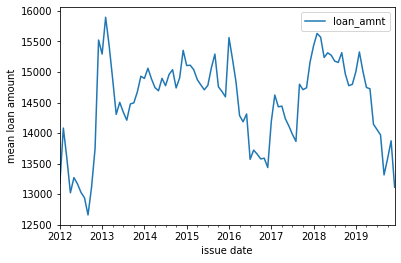

In [48]:
df_loan_amnt.plot()
plt.ylabel('mean loan amount')
plt.xlabel('issue date')
plt.show()

 ### Stationarity
A stationary time series is a time series in which the statistic properties remain constant over time.
In other words, we should expect to see no trend or seasonality in a stationary time series. This is an assumption to make since if we can assume that the properties remain constant on past data, they will also remain constant on future data.
This will allow us to do forecasting on the data, which is a key component of what we are trying to
achieve with this analysis

 - Null hypothesis : The time series is not stationary (has time-dependent structure)
 - Alternative hypothesis : The time series is stationary (does not have time-dependent structure)

In [49]:
# Augmented Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller
#series = read_csv('daily-total-female-births.csv', header=0, index_col=0, squeeze=True)
X = df_loan_amnt['loan_amnt'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.677392
p-value: 0.078033
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583


p>0.05, can not reject null hypothesis, so time-series data is not stationary.

### Decomposition
Decompose a time series into the three different components: trend, seasonality, and stationary noise.


<Figure size 1080x432 with 0 Axes>

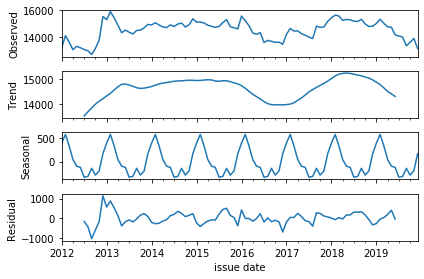

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(15,6))
series = df_loan_amnt
result = seasonal_decompose(series, model='additive')
result.plot()
plt.xlabel('issue date')
plt.show()

## Investment return for each loan

Here, I try to calculate the annual loan investiment return $r$ based on the following assumption:
$$
r = \frac{p-f}{p}\times \frac{12}{t}
$$

$f$ is the total amount of loan invested (total payment)

$p$ is the total amount of repaid from the loan (funded amount)

$t$ is the loan period in month 

* this simple model does not consider reinvestiment.

In [127]:
df['return'] = ( (df['total_pymnt'] - df['funded_amnt'] )
                                            / df['funded_amnt'] ) * (12 / df['loan_period'])

In [136]:
# check negative return

print('negative return (loss): ', round(len(df['return'][df['return']<0])/len(df['return']),2))
print('posive return (gain):', round(len(df['return'][df['return']>0])/len(df['return']),2))
print('maximun return:', np.max(df['return']))
print('maximun loss:', np.min(df['return']))

negative return (loss):  0.18
posive return (gain): 0.82
maximun return: 1.67566506617647
maximun loss: -12.7740085875


Based on this simple model, 82% of investiment has postive return.  

Next, check the distribution of postive and negative return:

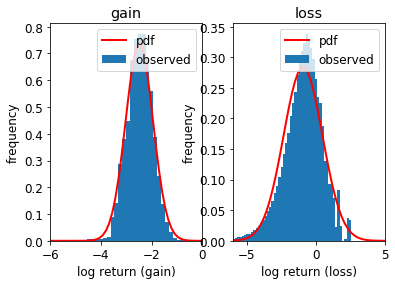

In [164]:
plt.subplot(121)

log_return_pos = np.log(df[df['return']>0]['return'])

log_return_pos.hist(bins=100, normed=True, label='observed')
plt.xlim([-6,0])
plt.grid(False)
plt.xlabel('log return (gain)')
plt.ylabel('frequency')
x1 = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x1, stats.norm.pdf(x1, log_return_pos.mean(),log_return_pos.std()), 'r', lw=2.0, label='pdf')
plt.legend()
plt.title('gain')


plt.subplot(122)

log_return_neg = np.log(-df[df['return']<0]['return'])

log_return_neg.hist(bins=100, normed=True, label='observed')
plt.xlim([-6,5])
plt.grid(False)
plt.xlabel('log return (loss)')
plt.ylabel('frequency')
x2 = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x2, stats.norm.pdf(x2, log_return_neg.mean(),log_return_neg.std()), 'r', lw=2.0, label='pdf')
plt.legend()
plt.title('loss')

plt.show()

### Normality test
- Shapiro-Wilk Test

In [166]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(log_return_neg)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.977, p=0.000
Sample does not look Gaussian (reject H0)


## Hypothesis test: 

### Does income affect default rate?

Compare the default rate of borrowers with income below median income (low income) vs borrowers with income above median income (high income).

In [6]:
# median income for entire population
median_inc = df['annual_inc'].median()
# high income vs low income
inc_above = df[df['annual_inc'] > median_inc]['target']
inc_below = df[df['annual_inc'] <= median_inc]['target']

In [7]:
print('default rate for high income borrower =', round(sum(inc_above)/len(inc_above),2))
print('default rate for low income borrower =', round(sum(inc_below)/len(inc_below),2))

default rate for high income borrower = 0.18
default rate for low income borrower = 0.22


In [8]:
def two_sided_ztest(data1, data2, value):
    ztest ,pval = stests.ztest(x1=data1, x2=data2 , value=value, alternative='two-sided')
    print('p value =', pval)
    if pval<0.05:
        print("reject null hypothesis")
    else:
        print("accept null hypothesis")

Hypothesis test:
- Null Hypothesis: The default rates for low income borrower and high income borrower are the same
- Alternative Hypothesis: The default rate for low income borrower is higher than that of high income borrower

In [9]:
two_sided_ztest(inc_below, inc_above,0)

p value = 0.0
reject null hypothesis


- Null hypothesis is rejected
- **The borrowers with income below median income are more likely to default on a loan.**


### Does different purpose of loan request affect default and interest rate?

In [10]:
df_purpose = df[['purpose','target', 'int_rate']]#.value_counts(normalize=True)

In [11]:
df['purpose'].value_counts()

debt_consolidation    960269
credit_card           370990
home_improvement      109503
other                  98018
major_purchase         35340
medical                19488
small_business         17101
car                    16636
vacation               11565
moving                 11390
house                   9271
wedding                 1342
renewable_energy        1061
educational                2
Name: purpose, dtype: int64

In [12]:
# remove educational 
df_purpose = df_purpose[df_purpose['purpose'] != 'educational']

In [13]:
df_purpose_1 = pd.DataFrame(df_purpose.groupby('purpose')['target'].sum()/df_purpose.groupby('purpose')['target'].count())
df_purpose_1.rename(columns={'target':'default_rate'}, inplace=True)
df_purpose_1=df_purpose_1.sort_values(by='default_rate', ascending=False)

In [14]:
df_purpose_2 =pd.DataFrame(df_purpose.groupby('purpose')['int_rate'].mean())
df_purpose_2.rename(columns={'int_rate':'mean_int_rate'}, inplace=True)
df_purpose_3 =pd.DataFrame(df_purpose.groupby('purpose')['int_rate'].std())
df_purpose_3.rename(columns={'int_rate':'std_int_rate'}, inplace=True)

In [15]:
df_purpose_4 = pd.concat([df_purpose_1, df_purpose_2, df_purpose_3], axis=1, join='inner')
df_purpose_4

,default_rate,mean_int_rate,std_int_rate
purpose,,,
small_business,0.291036,15.927872,5.388915
house,0.229425,15.101172,5.814447
moving,0.227656,15.066790,4.994392
renewable_energy,0.215834,15.377672,5.092227
medical,0.209565,13.911528,4.848425
debt_consolidation,0.208480,13.596403,4.812768
other,0.204024,14.504734,5.104129
major_purchase,0.190549,12.830134,4.989824
vacation,0.183312,13.635814,4.582070


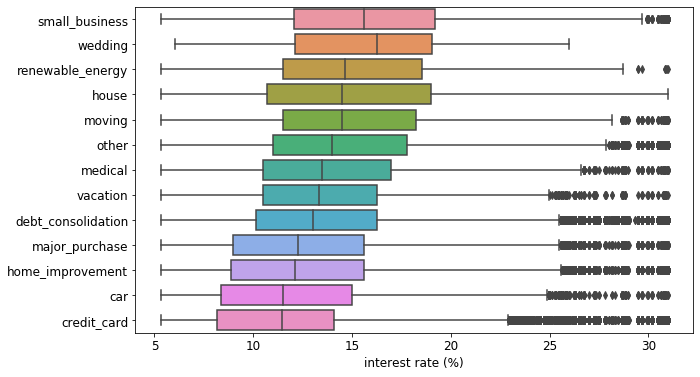

In [16]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 12})
ranks = df_purpose_4['mean_int_rate'].sort_values(ascending=False).index
sns.boxplot(x='int_rate', y='purpose', data=df_purpose, order=ranks)
plt.xlabel('interest rate (%)')
plt.ylabel('')
plt.show()

The data has a very wide spread (large variation). 
perform ANOVA test to see if different purposes have different interest rate.

- Null Hypothesis: Different purposes have the same interest rate.
- Alternative Hypothesis: At least one purpose in the group has different interest rate.

In [17]:
list_purpose = df_purpose['purpose'].unique()
list_purpose

array(['other', 'debt_consolidation', 'home_improvement', 'credit_card',
       'major_purchase', 'small_business', 'house', 'moving', 'medical',
       'car', 'vacation', 'renewable_energy', 'wedding'], dtype=object)

In [18]:
df_purpose_new = pd.DataFrame()
for i, col in enumerate(list_purpose):
    df_purpose_new[col] = df_purpose[df_purpose['purpose']==str(col)]['int_rate'].reset_index(drop=True)

In [19]:
df_purpose_new.head()

,other,debt_consolidation,home_improvement,credit_card,major_purchase,small_business,house,moving,medical,car,vacation,renewable_energy,wedding
0,14.98,7.62,10.99,13.53,14.98,18.25,13.53,20.50,20.50,7.62,19.22,22.4,25.80
1,16.24,10.99,13.98,7.62,15.61,18.25,23.40,13.53,13.98,15.61,14.98,20.5,11.99
2,19.22,10.99,20.50,17.57,16.24,25.80,22.40,20.50,18.25,11.99,18.25,20.2,19.20
3,13.53,6.62,9.67,9.67,11.99,18.25,20.50,10.99,16.24,14.47,15.61,23.4,12.99
4,19.97,12.85,12.85,10.99,13.53,23.70,24.08,19.22,16.24,14.98,13.53,23.7,20.20


In [20]:
# compute one-way ANOVA P value   
from scipy import stats  

data = [df_purpose_new[col].dropna() for col in df_purpose_new]
      
f_val, p_val = stats.f_oneway(*data)
  
print("One-way ANOVA P =", p_val)  
  
#One-way ANOVA P = 0.381509481874  

One-way ANOVA P = 0.0


p value for ANOVA test is very small, so we can reject null hypothesis.

- different purpose can affect the interest rate. 

### Does different purpose affect default?
- Chi2 test

In [21]:
# make contingency table
con_table = pd.crosstab(df_purpose['target'], df_purpose['purpose'])/len(df_purpose)            
con_table["P(target)"] = con_table.sum(axis=1).rename("P(purpose)")
con_table.append(con_table.sum(axis=0).rename(f"P({df_purpose['purpose'].name})"))                  

purpose,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,P(target)
target,,,,,,,,,,,,,,
0,0.008531,0.185389,0.457331,0.054394,0.004299,0.017212,0.009268,0.005293,0.046944,0.000501,0.007295,0.005683,0.000701,0.80284
1,0.001479,0.037834,0.120457,0.011493,0.001280,0.004052,0.002457,0.001560,0.012033,0.000138,0.002995,0.001276,0.000106,0.19716
P(purpose),0.010010,0.223223,0.577788,0.065887,0.005578,0.021264,0.011726,0.006853,0.058977,0.000638,0.010290,0.006959,0.000807,1.00000


In [22]:
#con_table#.sum(axis=1)
n=len(df_purpose)  
statistic, p_value, _, exp = stats.chi2_contingency(con_table * n)
print('Chi2 statistic =', statistic)
print('p value=', p_value)

Chi2 statistic = 4376.101536166306
p value= 0.0


small p value means we can reject the null hypothesis. 
- It means different purpose affect default.

#### Default rate over time
#### Bayesian Changepoint Detection

In [51]:
df_time = df[['issue_d','target','term']]
df_time.set_index('issue_d',inplace=True)

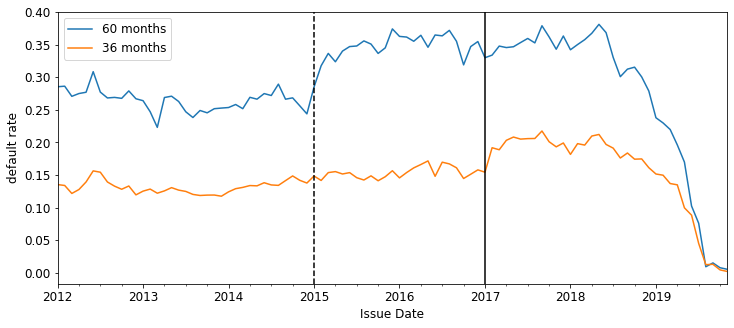

In [52]:
# default rate over years
plt.figure(figsize=(12,5)) 

plt.rcParams.update({'font.size': 12})
df_time_default_60m = df_time.query("term == ' 60 months'")\
.groupby('issue_d')['target'].value_counts(normalize=True).to_frame() #
df_time_default_60m.rename(columns={'target':'60 months'}, inplace=True)
df_time_default_60m.reset_index(level=1,inplace=True)

ax = df_time_default_60m.query("target == 1")['60 months'].plot(label='60 months')#.rolling(2).mean().plot(label='60 months')

df_time_default_36m = df_time.query("term == ' 36 months'")\
.groupby('issue_d')['target'].value_counts(normalize=True).to_frame() 
df_time_default_36m.rename(columns={'target':'36 months'}, inplace=True)
df_time_default_36m.reset_index(level=1,inplace=True)

df_time_default_36m.query(" target == 1 ")['36 months'].plot(label='36 months', ax=ax)#.rolling(2).mean().plot(label='36 months', ax=ax)

ax.axvline("2017-01-01", color="black", linestyle="-")
ax.axvline("2015-01-01", color="black", linestyle="--")

plt.xlabel('Issue Date')
plt.ylabel('default rate')
plt.legend()
plt.show()

In [53]:
df_60m = df_time_default_60m.query("target == 1").reset_index()
df_60m.head()

,issue_d,target,60 months
0,2012-01-01,1,0.285451
1,2012-02-01,1,0.286316
2,2012-03-01,1,0.270758
3,2012-04-01,1,0.275046
4,2012-05-01,1,0.277017


In [54]:
df_60m['60 months'].values

array([0.2854512 , 0.28631579, 0.27075812, 0.27504554, 0.27701674,
       0.30859375, 0.27725118, 0.26826722, 0.26911619, 0.26767201,
       0.27906977, 0.26703645, 0.26406602, 0.24709677, 0.22313148,
       0.2689307 , 0.27096273, 0.26281588, 0.24701467, 0.23824541,
       0.24901909, 0.24545675, 0.2517684 , 0.25273607, 0.25357229,
       0.2582214 , 0.25179561, 0.26923077, 0.26642153, 0.27496024,
       0.27201796, 0.28949275, 0.26635659, 0.26840503, 0.25622185,
       0.24381625, 0.28492799, 0.31768559, 0.33660792, 0.3238065 ,
       0.3401962 , 0.34711525, 0.34801052, 0.35580233, 0.35094796,
       0.33659678, 0.3451445 , 0.37422481, 0.36272831, 0.36171042,
       0.35526979, 0.36442786, 0.34605479, 0.36488688, 0.36357797,
       0.37197665, 0.35524568, 0.3190421 , 0.34712022, 0.35481336,
       0.33003082, 0.33398342, 0.34786841, 0.34559696, 0.34684768,
       0.35330049, 0.35958055, 0.35275652, 0.37904032, 0.36194105,
       0.34302649, 0.36330863, 0.34221165, 0.35022026, 0.35770

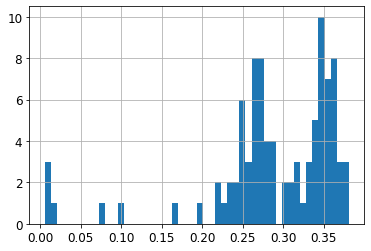

In [26]:
#time_max = df_time_default_60m.index.max()
#time_min = df_time_default_60m.index.min()
df_60m['60 months'].hist(bins=50)

In [55]:
with pm.Model() as model:
    nu = pm.Exponential('nu', 1/10., testval=.3)
    sigma = pm.Exponential('sigma', 1/0.02, testval=.1)
    s = pm.GaussianRandomWalk('s', sigma=sigma, shape=len(df_60m))
    
    volatility_process = pm.Deterministic('volatility_process', pm.math.exp(-2*s)**0.5)

    r = pm.StudentT('r', nu=nu, sigma=volatility_process, observed=df_60m['60 months'])

In [56]:
with model:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [s, sigma, nu]
Sampling 2 chains, 132 divergences: 100%|██████████| 5000/5000 [05:29<00:00, 15.19draws/s] 
The acceptance probability does not match the target. It is 0.6750183476694998, but should be close to 0.8. Try to increase the number of tuning steps.
There were 132 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6026222538678022, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


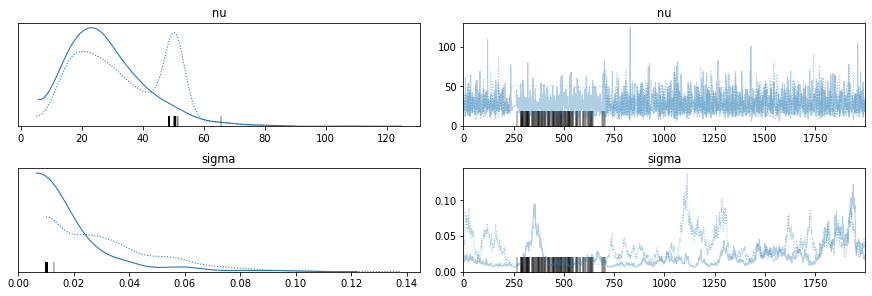

In [57]:
pm.traceplot(trace, varnames=['nu', 'sigma']);

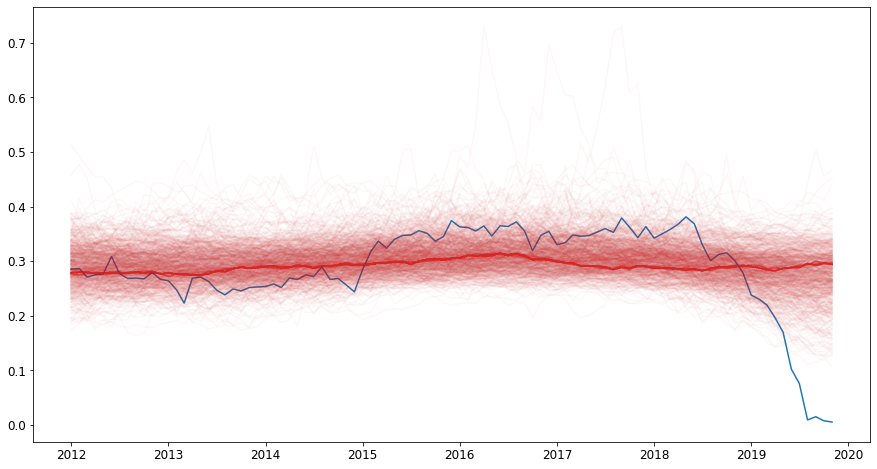

In [60]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(df_60m.issue_d, df_60m['60 months'])
plt.plot(df_60m.issue_d, 1/np.exp(trace['s',::5].T), 'C3', alpha=.03);
#ax.set(title='volatility_process', xlabel='time', ylabel='volatility');
#ax.legend(['60 month', 'stochastic volatility process']);

In [122]:
years = df_60m.index
with pm.Model() as model_sw:
    switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper=years.max(), testval=years.max())
    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 2)
    late_rate = pm.Exponential('late_rate', 3)
    
     # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)
    
    #nu = pm.Exponential('nu', 1/10., testval=5.)
    #sigma = pm.Exponential('sigma', 1/0.02, testval=.1)
    #s = pm.GaussianRandomWalk('s', sigma=sigma, shape=len(df_60m))
    
    #volatility_process = pm.Deterministic('volatility_process', pm.math.exp(-2*s)**0.5)

    r = pm.StudentT('r', rate, observed=df_60m['60 months'])
      

In [123]:
with model_sw:
    trace = pm.sample(1000)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:04<00:00, 654.94draws/s]
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


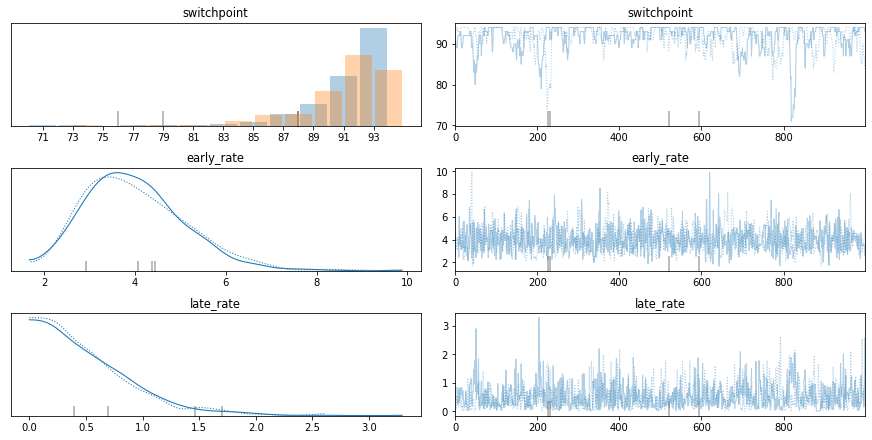

In [124]:
pm.traceplot(trace);

In [89]:
trace['switchpoint'].mean()

44.90875

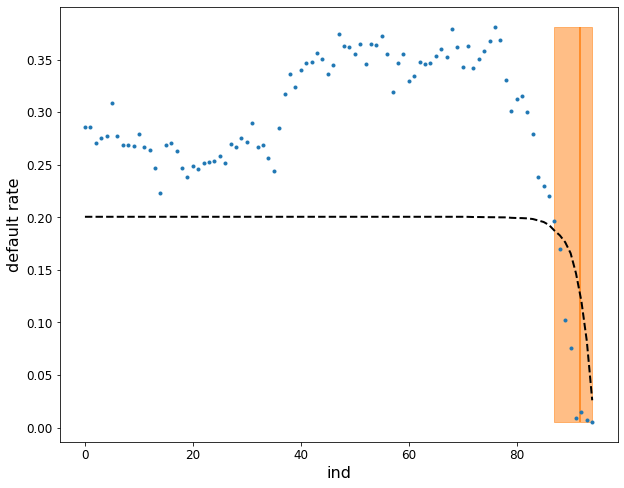

In [125]:
plt.figure(figsize=(10, 8))
plt.plot(years, df_60m['60 months'], '.')
plt.ylabel("default rate", fontsize=16)
plt.xlabel("ind", fontsize=16)

plt.vlines(trace['switchpoint'].mean(), df_60m['60 months'].min(), df_60m['60 months'].max(), color='C1')
average_disasters = np.zeros_like(df_60m['60 months'], dtype='float')
for i, year in enumerate(years):
    idx = year < trace['switchpoint']
    average_disasters[i] = (trace['early_rate'][idx].sum() + trace['late_rate'][~idx].sum()) / (len(trace) * trace.nchains*20)

sp_hpd = pm.hpd(trace['switchpoint'])
plt.fill_betweenx(y=[df_60m['60 months'].min(), df_60m['60 months'].max()],
                  x1=sp_hpd[0], x2=sp_hpd[1], alpha=0.5, color='C1');
plt.plot(years, average_disasters,  'k--', lw=2);